In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix    #from scikit learn RandomizedSearchCV & GridSearchCV help files
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV    #from scikit learn RandomizedSearchCV & GridSearchCV help files

#cross validation
from sklearn.model_selection import train_test_split 

https://scikit-learn.org/stable/model_selection.html

In [2]:
#data
rawData = pd.read_csv('modified default of credit card clients.csv', header=0)
rawData.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,0,0,0,0,...,689,0,0,0,0,0,0,0,0,1
1,120000,0,2,26,0,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,1,57,0,0,0,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1


In [3]:
rawData.dtypes

LIMIT_BAL                    int64
SEX                          int64
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int64
EDUCATION_graduate school    int64
EDUCATION_high school        int64
EDUCATION_other              int64
EDUCATION_university         int64
dtype: object

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 27 columns):
LIMIT_BAL                    29965 non-null int64
SEX                          29965 non-null int64
MARRIAGE                     29965 non-null int64
AGE                          29965 non-null int64
PAY_0                        29965 non-null int64
PAY_2                        29965 non-null int64
PAY_3                        29965 non-null int64
PAY_4                        29965 non-null int64
PAY_5                        29965 non-null int64
PAY_6                        29965 non-null int64
BILL_AMT1                    29965 non-null int64
BILL_AMT2                    29965 non-null int64
BILL_AMT3                    29965 non-null int64
BILL_AMT4                    29965 non-null int64
BILL_AMT5                    29965 non-null int64
BILL_AMT6                    29965 non-null int64
PAY_AMT1                     29965 non-null int64
PAY_AMT2                     29965 non-nu

In [5]:
rawData.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [6]:
#features
X = rawData.iloc[:,1:27]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,0,1,24,2,2,0,0,0,0,3913,...,689,0,0,0,0,0,0,0,0,1
1,0,2,26,0,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,0,0,0,0,1
2,0,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,0,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,1,1,57,0,0,0,0,0,0,8617,...,36681,10000,9000,689,679,1,0,0,0,1


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 26 columns):
SEX                          29965 non-null int64
MARRIAGE                     29965 non-null int64
AGE                          29965 non-null int64
PAY_0                        29965 non-null int64
PAY_2                        29965 non-null int64
PAY_3                        29965 non-null int64
PAY_4                        29965 non-null int64
PAY_5                        29965 non-null int64
PAY_6                        29965 non-null int64
BILL_AMT1                    29965 non-null int64
BILL_AMT2                    29965 non-null int64
BILL_AMT3                    29965 non-null int64
BILL_AMT4                    29965 non-null int64
BILL_AMT5                    29965 non-null int64
BILL_AMT6                    29965 non-null int64
PAY_AMT1                     29965 non-null int64
PAY_AMT2                     29965 non-null int64
PAY_AMT3                     29965 non-nu

In [8]:
#dependent variable
y = rawData['LIMIT_BAL']

In [9]:
y.head(15)

0      20000
1     120000
2      90000
3      50000
4      50000
5      50000
6     500000
7     100000
8     140000
9      20000
10    200000
11    260000
12    630000
13     70000
14    250000
Name: LIMIT_BAL, dtype: int64

In [10]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR())) #tried parameters,SVR(C=10000000, cache_size=2000))) default c is 1 cache is 200
print(algosClass)

[('Random Forest Regressor', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)), ('Linear Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('Support Vector Regression', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]


In [11]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [12]:
for i in range(len(names)):
    print('Cross_Val_Score for', names[i], results[i].mean())

Cross_Val_Score for Random Forest Regressor 0.4664912254920052
Cross_Val_Score for Linear Regression 0.28642265796442296
Cross_Val_Score for Support Vector Regression -0.05032325438770191


In [21]:
#Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123) 

In [22]:
algo = RandomForestRegressor()    #tried using randomly n_estimators=200

In [23]:
model = algo.fit(X_train,y_train)

In [24]:
predictions = model.predict(X_test)

In [25]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [26]:
predRsquared = r2_score(y_test,predictions)

In [27]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared Score for Random Forest: %.3f' % predRsquared)
print('RMSE Score for Random Fores: %.3f' % rmse)

R Squared Score for Random Forest: 0.470
RMSE Score for Random Fores: 94322.515


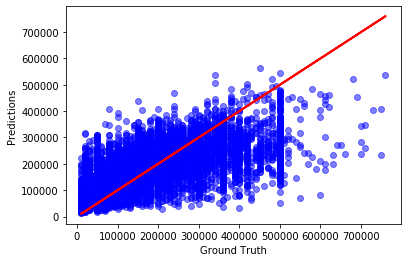

In [28]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

Above was done using only default parameters

In [29]:
algo = SVR()

In [30]:
model = algo.fit(X_train,y_train)

In [31]:
predictions = model.predict(X_test)

In [32]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [33]:
predRsquared = r2_score(y_test,predictions)

In [34]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared Score for SVR: %.3f' % predRsquared)
print('RMSE Score for SVR: %.3f' % rmse)

R Squared Score for SVR: -0.038
RMSE Score for SVR: 131963.727


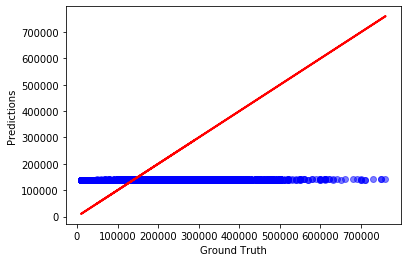

In [35]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

Above was done using only default parameters

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

In [36]:
#attempt at parameter tuning for SVR
#https://scikit-learn.org/stable/modules/grid_search.html#grid-search

#defining parameters
parameters = [{'C': [10, 100, 1000, 10000, 1000000], 'kernel': ['rbf']}]

grid_search = GridSearchCV(SVR(), param_grid = parameters, refit=True, verbose = 0,n_jobs = -1, cv = 5, scoring = 'r2')

#fitting for the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 10000, 1000000],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [37]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.3383056430352123
{'C': 1000000, 'kernel': 'rbf'}
SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [41]:
#attempt at parameter tuning for Random Forest Regressor
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#defining parameters
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto','sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth.append(None)
min_samples_split = [2,5,10,20]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [ ]:
#Using Random Grid to Search for Best Hyperparameters
#Create Base Model
RF_wParams = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=RF_wParams, param_distributions = random_grid, n_iter=60, cv=5, n_jobs=-1)

#Fit Random Search Model
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

MODEL TRAINING PREDICTIONS WITH TUNING RESULTS

In [149]:
algosTunClass = []
algosTunClass.append(('Random Forest Regressor',RandomForestRegressor()))
#algosTunClass.append(('Linear Regression',LinearRegression()))
algosTunClass.append(('Support Vector Regression',SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))
print(algosTunClass)

[('Support Vector Regression', SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]


In [150]:
#regression
results = []
names = []
for name, model in algosTunClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [151]:
for i in range(len(names)):
    print('Cross_Val_Score for', names[i], results[i].mean())

Cross_Val_Score for Support Vector Regression 0.30629177217942705


In [173]:
#Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123) 

In [174]:
tunedSVR_algo = SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [175]:
tunedSVR_model = tunedSVR_model.fit(X_train,y_train)

In [176]:
tunedSVR_predictions = tunedSVR_model.predict(X_test)

In [177]:
tunedSVR_rmse = sqrt(mean_squared_error(y_test, tunedSVR_predictions))

In [178]:
#Make Predictions
tunedSVR_predictions = tunedSVR_model.predict(X_test)
tunedSVR_predRsquared = r2_score(y_test,tunedSVR_predictions)
tunedSVR_rmse = sqrt(mean_squared_error(y_test, tunedSVR_predictions))
print('R Squared Score for SVR: %.3f' % tunedSVR_predRsquared)
print('RMSE Score for SVR: %.3f' % rmse)

R Squared Score for SVR: 0.307
RMSE Score for SVR: 107790.315


In [ ]:
#classification attempt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR